In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('laptop_details.csv')

In [4]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [6]:
df['Product'][0]

'Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14ITL05 Thin and Light Laptop'

# Feature Extraction/Engineering

In [7]:
one = df.Feature[0]

In [8]:
features = ['Processor','RAM','Operating System' ,'SSD','Display', 'Warranty']

In [9]:
import re
splited = re.split(r'Processor|RAM|Operating System|SSD|Display|Warranty',one)

In [10]:
splited

['Intel Core i3 ',
 ' (11th Gen)8 GB DDR4 ',
 '64 bit Windows 11 ',
 '256 GB ',
 '35.56 cm (14 inch) ',
 'Office Home and Student 20212 Year Onsite�',
 '']

In [11]:
li = [0 for i in range(len(df['Feature']))]
for i in range(len(df['Feature'])):
  li[i]= re.split(r'Processor|RAM|Operating System|SSD|Display|Warranty',df['Feature'][i])

In [12]:
import re
def feature(one):
  string = one
  delimiters = ['Processor','RAM','Operating System' ,'SSD','HDD','Display', 'Warranty']

  # Create a regular expression pattern from the delimiters
  pattern = "|".join(map(re.escape, delimiters))

  # Split the string using the pattern and capture the delimiters
  result = re.split(f"({pattern})", string)

  # Loop through the result list and print each split value along with its delimiter
  dic = {}
  i = 0
  while i <len(result):
      if result[i] in delimiters:
        dic[result[i]] = result[i-1]
        i = i+2
      else:
        i = i+1
    
  return dic

        

In [13]:
result = []
for i in range(len(df['Feature'])):
  result.append(feature(df["Feature"][i]))

In [14]:
result

[{'Processor': 'Intel Core i3 ',
  'RAM': ' (11th Gen)8 GB DDR4 ',
  'Operating System': '64 bit Windows 11 ',
  'SSD': '256 GB ',
  'Display': '35.56 cm (14 inch) ',
  'Warranty': 'Office Home and Student 20212 Year Onsite�'},
 {'Processor': 'Intel Core i3 ',
  'RAM': ' (11th Gen)8 GB DDR4 ',
  'Operating System': '64 bit Windows 11 ',
  'SSD': '512 GB ',
  'Display': '39.62 cm (15.6 inch) ',
  'Warranty': 'Office Home and Student 20212 Year Onsite�'},
 {'Processor': 'Intel Core i3 ',
  'RAM': ' (10th Gen)8 GB DDR4 ',
  'Operating System': '64 bit Windows 11 ',
  'SSD': '512 GB ',
  'Display': '39.62 cm (15.6 inch) ',
  'Warranty': 'Office Home and Student 20211 Year Onsite '},
 {'Processor': 'AMD Ryzen 5 Hexa Core ',
  'RAM': '8 GB DDR4 ',
  'Operating System': '64 bit Windows 10 ',
  'SSD': '512 GB ',
  'Display': '39.62 cm (15.6 inch) ',
  'Warranty': 'HP Documentation, HP e-service, HP BIOS Recovery, HP SSRM, HP Smart, HP Jumpstarts1 Year Onsite '},
 {'Processor': 'Intel Core i5 '

In [15]:
new = pd.DataFrame(result)

In [16]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Processor         720 non-null    object
 1   RAM               720 non-null    object
 2   Operating System  720 non-null    object
 3   SSD               693 non-null    object
 4   Display           720 non-null    object
 5   Warranty          655 non-null    object
 6   HDD               48 non-null     object
dtypes: object(7)
memory usage: 39.5+ KB


In [17]:
new.shape

(720, 7)

In [18]:
new['Rating'] = df['Rating']

In [19]:
new['MRP'] = df['MRP']

In [20]:
new.head()

,Processor,RAM,Operating System,SSD,Display,Warranty,HDD,Rating,MRP
0,Intel Core i3,(11th Gen)8 GB DDR4,64 bit Windows 11,256 GB,35.56 cm (14 inch),Office Home and Student 20212 Year Onsite�,NaN,4.2,"₹36,990"
1,Intel Core i3,(11th Gen)8 GB DDR4,64 bit Windows 11,512 GB,39.62 cm (15.6 inch),Office Home and Student 20212 Year Onsite�,NaN,4.2,"₹39,990"
2,Intel Core i3,(10th Gen)8 GB DDR4,64 bit Windows 11,512 GB,39.62 cm (15.6 inch),Office Home and Student 20211 Year Onsite,NaN,4.3,"₹32,990"
3,AMD Ryzen 5 Hexa Core,8 GB DDR4,64 bit Windows 10,512 GB,39.62 cm (15.6 inch),"HP Documentation, HP e-service, HP BIOS Recove...",NaN,4.4,"₹49,990"
4,Intel Core i5,(10th Gen)8 GB DDR4,Windows 11,512 GB,39.62 cm (15.6 inch),1 Year Onsite,NaN,4.4,"₹49,990"


In [21]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Processor         720 non-null    object 
 1   RAM               720 non-null    object 
 2   Operating System  720 non-null    object 
 3   SSD               693 non-null    object 
 4   Display           720 non-null    object 
 5   Warranty          655 non-null    object 
 6   HDD               48 non-null     object 
 7   Rating            581 non-null    float64
 8   MRP               720 non-null    object 
dtypes: float64(1), object(8)
memory usage: 50.8+ KB


In [22]:
len(new['Processor'].unique())

48

In [23]:
new.isnull().sum()

Processor             0
RAM                   0
Operating System      0
SSD                  27
Display               0
Warranty             65
HDD                 672
Rating              139
MRP                   0
dtype: int64

# Univariate Anlysis

 **1. Rating**

In [24]:
new['Rating'].mean()

4.321170395869192

In [25]:
new['Rating'].median()

4.3

In [26]:
new["Rating"].describe()

count    581.000000
mean       4.321170
std        0.282872
min        3.000000
25%        4.200000
50%        4.300000
75%        4.500000
max        5.000000
Name: Rating, dtype: float64

<AxesSubplot: >

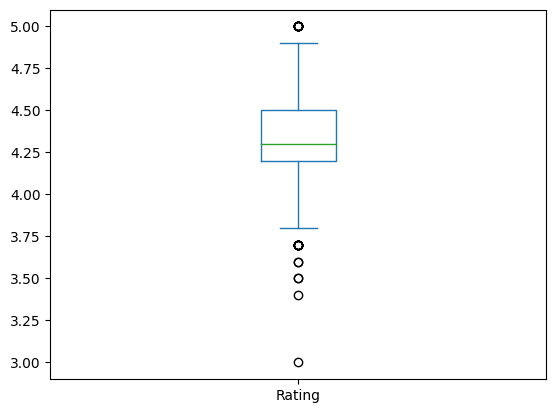

In [27]:
new['Rating'].plot(kind = 'box')

<AxesSubplot: ylabel='Density'>

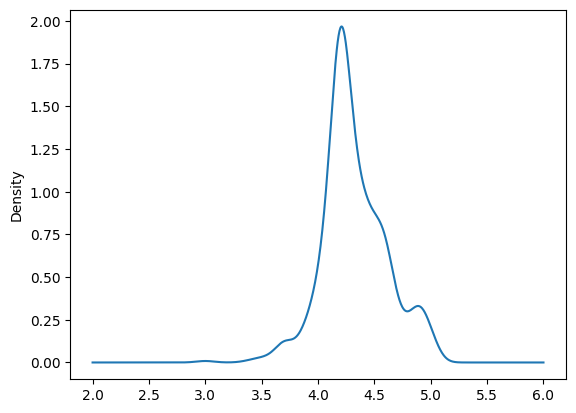

In [28]:
new['Rating'].plot(kind = 'kde')

In [29]:
new['Rating'].fillna(new['Rating'].mean(),inplace = True)

In [30]:
new.isnull().sum()

Processor             0
RAM                   0
Operating System      0
SSD                  27
Display               0
Warranty             65
HDD                 672
Rating                0
MRP                   0
dtype: int64

**2. Processor**

In [31]:
new['Processor']

0                Intel Core i3 
1                Intel Core i3 
2                Intel Core i3 
3        AMD Ryzen 5 Hexa Core 
4                Intel Core i5 
                 ...           
715    Intel Celeron Dual Core 
716      AMD Ryzen 7 Octa Core 
717      AMD Ryzen 9 Octa Core 
718              Intel Core i7 
719              Intel Core i5 
Name: Processor, Length: 720, dtype: object

In [32]:
c = 0
fet = set()
for i in range(len(new["Processor"])):
  if len(new["Processor"][i]) <= 30:
    for ele in new["Processor"][i].split():
      fet.add(ele)
      

print(len(fet))

30


In [33]:
change = {'Corei3':'Intel Core i3 ','Corei5':'Intel Core i5 ','Corei7':'Intel Core i7 ','Corei9':'Intel Core i9 ','GenCorei3':'Intel Core i3 ',
          'GenRyzen3DualCore':'AMD Ryzen 3 Dual Core ','Ryzen5DualCore':'AMD Ryzen 5 Dual Core ',
          'Ryzen5HexaCore':'AMD Ryzen 5 Hexa Core ','Ryzen7OctaCore':'AMD Ryzen 7 Octa Core ','PentiumSilver':'Intel Pentium Silver ',
          '2GenGen2IntelCorei3':'Intel Core i3 '}

In [34]:
for i in range(len(new["Processor"])):
  if len(new["Processor"][i]) >= 35:
    ans = ''
    for ele in new["Processor"][i].split():
      if ele in fet:
        ans += ele
    new["Processor"][i] = change[ans]

/var/folders/4d/n5ryh7yn1zg92_n6l1vvp_v80000gn/T/ipykernel_57056/3740441522.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new["Processor"][i] = change[ans]


In [35]:
c = 0
for i in range(len(new["Processor"])):
  if len(new["Processor"][i]) > 30:
    c += 1

print(c)

0


In [36]:
len(new['Processor'].unique())

24

<AxesSubplot: >

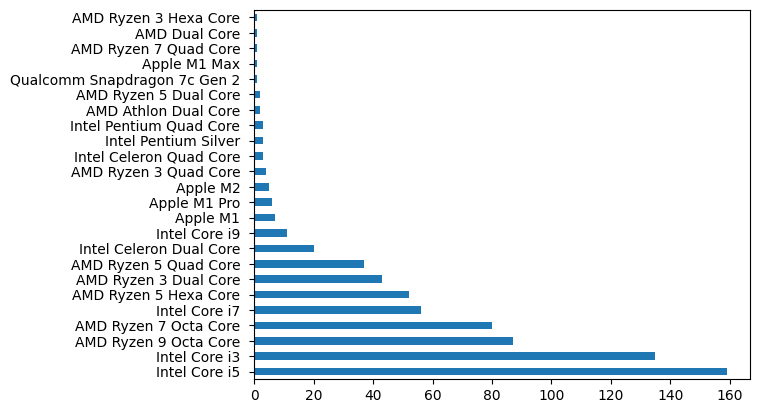

In [37]:
new['Processor'].value_counts().plot(kind = 'barh')

In [38]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Processor         720 non-null    object 
 1   RAM               720 non-null    object 
 2   Operating System  720 non-null    object 
 3   SSD               693 non-null    object 
 4   Display           720 non-null    object 
 5   Warranty          655 non-null    object 
 6   HDD               48 non-null     object 
 7   Rating            720 non-null    float64
 8   MRP               720 non-null    object 
dtypes: float64(1), object(8)
memory usage: 50.8+ KB


**3. RAM**

In [39]:
new["RAM"][0].split()

['(11th', 'Gen)8', 'GB', 'DDR4']

In [40]:
new["RAM"].unique()

array([' (11th Gen)8 GB DDR4 ', ' (10th Gen)8 GB DDR4 ', '8 GB DDR4 ',
       '16 GB DDR4 ', '16 GB DDR5 ', '4 GB LPDDR4 ',
       ' (12th Gen)8 GB DDR4 ', ' (12th Gen)16 GB DDR4 ', '4 GB DDR4 ',
       '8 GB Unified Memory ', '8 GB LPDDR4X ',
       ' (10th Gen)8 GB LPDDR4X ', ' (11th Gen)16 GB DDR4 ',
       '16 GB Unified Memory ', ' (5th Gen)16 GB DDR4 ', '4 GB LPDDR4X ',
       ' (10th Gen)16 GB LPDDR4X ', ' (10th Gen)4 GB DDR4 ',
       ' (11th Gen)8 GB LPDDR4X ', ' (12th Gen)16 GB LPDDR5 ',
       ' (11th Gen)16 GB LPDDR4X ', ' (12th Gen)16 GB DDR5 ',
       '32 GB Unified Memory ', ' (11th Gen)16 GB LPDDR4 ',
       ' (4th Gen)4 GB DDR4 ', ' (12th Gen)8 GB LPDDR4X ',
       ' (12th Gen)32 GB DDR5 ', ' (3rd Gen)8 GB DDR4 ', '16 GB LPDDR5 ',
       ' (5th Gen)8 GB DDR4 ', ' (10th Gen)16 GB DDR4 ',
       ' (9th Gen)8 GB DDR4 ', ' (11th Gen)4 GB DDR4 ',
       ' (8th Gen)4 GB DDR4 ', ' (12th Gen)16 GB LPDDR4X ',
       '16 GB LPDDR4X ', ' (7th Gen)8 GB DDR4 ', ' (4th Gen)8 GB DDR4

In [41]:
dic = {' (11th Gen)8 GB DDR4 ':'8 GB DDR4', '(10th Gen)8 GB DDR4 ':'8 GB DDR4',' (12th Gen)8 GB DDR4 ':'8 GB DDR4',' (12th Gen)16 GB DDR4 ':'16 GB DDR4',
       ' (10th Gen)8 GB LPDDR4X ':'8 GB LPDDR4X',' (11th Gen)16 GB DDR4 ':'16 GB DDR4',' (5th Gen)16 GB DDR4 ':'16 GB DDR4',
       ' (10th Gen)16 GB LPDDR4X ':'16 GB LPDDR4X',' (10th Gen)4 GB DDR4 ':'4 GB DDR4',' (11th Gen)8 GB LPDDR4X ':'8 GB LPDDR4X',
       ' (12th Gen)16 GB LPDDR5 ':'16 GB LPDDR5','(11th Gen)16 GB LPDDR4X ':'16 GB LPDDR4X',' (12th Gen)16 GB DDR5 ':'16 GB DDR5',
       ' (11th Gen)16 GB LPDDR4 ':'16 GB LPDDR4',' (4th Gen)4 GB DDR4 ':'4 GB DDR4', ' (12th Gen)8 GB LPDDR4X ':'8 GB LPDDR4X',
       ' (12th Gen)32 GB DDR5 ':'32 GB DDR5', ' (3rd Gen)8 GB DDR4 ':'8 GB DDR4',' (5th Gen)8 GB DDR4 ':'8 GB DDR4', ' (10th Gen)16 GB DDR4 ':'16 GB DDR4',
       ' (9th Gen)8 GB DDR4 ':'8 GB DDR4', ' (11th Gen)4 GB DDR4 ':'4 GB DDR4',' (8th Gen)4 GB DDR4 ':'4 GB DDR4', ' (12th Gen)16 GB LPDDR4X ':'16 GB LPDDR4X',
      ' (7th Gen)8 GB DDR4 ':'8 GB DDR4', ' (4th Gen)8 GB DDR4 ':'8 GB DDR4',' (12th Gen)8 GB DDR5 ':'8 GB DDR5',
       ' (9th Gen)16 GB DDR4 ':'16 GB DDR4', ' (11th Gen)32 GB DDR4 ':'32 GB DDR4',' (10th Gen)32 GB DDR4 ':'32 GB DDR4', ' (8th Gen)16 GB DDR4 ':'16 GB DDR4',
       ' (8th Gen)8 GB DDR4 ':'8 GB DDR4',' (10th Gen)16 GB LPDDR3 ':'16 GB LPDDR3',' (10th Gen)8 GB DDR4 ':'8 GB DDR4',
       ' (11th Gen)16 GB LPDDR4X ':'16 GB LPDDR4X'
      }

In [42]:
gen = {}
for ele in dic:
  arr = ele.split()
  ans = arr[0][1:]+' '+arr[1][:-2]
  if ans[-1] == ')':
    ans = ans[:-1]
  gen[ele] = ans
gen

{' (11th Gen)8 GB DDR4 ': '11th Gen',
 '(10th Gen)8 GB DDR4 ': '10th Gen',
 ' (12th Gen)8 GB DDR4 ': '12th Gen',
 ' (12th Gen)16 GB DDR4 ': '12th Gen',
 ' (10th Gen)8 GB LPDDR4X ': '10th Gen',
 ' (11th Gen)16 GB DDR4 ': '11th Gen',
 ' (5th Gen)16 GB DDR4 ': '5th Gen',
 ' (10th Gen)16 GB LPDDR4X ': '10th Gen',
 ' (10th Gen)4 GB DDR4 ': '10th Gen',
 ' (11th Gen)8 GB LPDDR4X ': '11th Gen',
 ' (12th Gen)16 GB LPDDR5 ': '12th Gen',
 '(11th Gen)16 GB LPDDR4X ': '11th Gen',
 ' (12th Gen)16 GB DDR5 ': '12th Gen',
 ' (11th Gen)16 GB LPDDR4 ': '11th Gen',
 ' (4th Gen)4 GB DDR4 ': '4th Gen',
 ' (12th Gen)8 GB LPDDR4X ': '12th Gen',
 ' (12th Gen)32 GB DDR5 ': '12th Gen',
 ' (3rd Gen)8 GB DDR4 ': '3rd Gen',
 ' (5th Gen)8 GB DDR4 ': '5th Gen',
 ' (10th Gen)16 GB DDR4 ': '10th Gen',
 ' (9th Gen)8 GB DDR4 ': '9th Gen',
 ' (11th Gen)4 GB DDR4 ': '11th Gen',
 ' (8th Gen)4 GB DDR4 ': '8th Gen',
 ' (12th Gen)16 GB LPDDR4X ': '12th Gen',
 ' (7th Gen)8 GB DDR4 ': '7th Gen',
 ' (4th Gen)8 GB DDR4 ': '4th Gen

In [43]:
new['Generation'] = 'any'

In [44]:
for i in range(len(new['RAM'])):
  if new['RAM'][i] in dic:
    new['Generation'][i] = gen[new['RAM'][i]]
    new['RAM'][i] = dic[new['RAM'][i]]
  else:
    new['RAM'][i] = new['RAM'][i].strip()

/var/folders/4d/n5ryh7yn1zg92_n6l1vvp_v80000gn/T/ipykernel_57056/186017997.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Generation'][i] = gen[new['RAM'][i]]
/var/folders/4d/n5ryh7yn1zg92_n6l1vvp_v80000gn/T/ipykernel_57056/186017997.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['RAM'][i] = dic[new['RAM'][i]]
/var/folders/4d/n5ryh7yn1zg92_n6l1vvp_v80000gn/T/ipykernel_57056/186017997.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [45]:
len(new['RAM'].unique())

18

<AxesSubplot: >

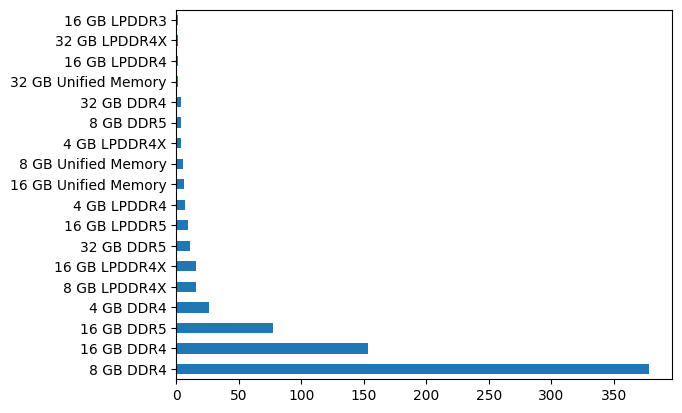

In [46]:
new['RAM'].value_counts().plot(kind = 'barh')

In [47]:
# converting the RAM column to two 

In [48]:
new["RAM In GB"] = 0 
new["RAM TYPE"] = ''

In [49]:
for i in new["RAM"].index:
  new["RAM In GB"][i] = int(new['RAM'][i][:2])
  arr = new['RAM'][i].split()
  for ele in arr[2:]:
    new['RAM TYPE'][i] += ele

/var/folders/4d/n5ryh7yn1zg92_n6l1vvp_v80000gn/T/ipykernel_57056/311154010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new["RAM In GB"][i] = int(new['RAM'][i][:2])
/var/folders/4d/n5ryh7yn1zg92_n6l1vvp_v80000gn/T/ipykernel_57056/311154010.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['RAM TYPE'][i] += ele


In [50]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Processor         720 non-null    object 
 1   RAM               720 non-null    object 
 2   Operating System  720 non-null    object 
 3   SSD               693 non-null    object 
 4   Display           720 non-null    object 
 5   Warranty          655 non-null    object 
 6   HDD               48 non-null     object 
 7   Rating            720 non-null    float64
 8   MRP               720 non-null    object 
 9   Generation        720 non-null    object 
 10  RAM In GB         720 non-null    int64  
 11  RAM TYPE          720 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 67.6+ KB


# 4. Operating system

In [51]:
new['Operating System'].unique()

array(['64 bit Windows 11 ', '64 bit Windows 10 ', 'Windows 11 ',
       'Mac OS ', 'DOS ', 'Windows 10 ', 'Chrome ', '32 bit Windows 11 ',
       '64 bit DOS ', '64 bit Chrome '], dtype=object)

In [52]:
new['Operating System'].isnull().sum()

0

In [53]:
for i in range(len(new['Operating System'])):
  new['Operating System'][i] = new['Operating System'][i].strip()

/var/folders/4d/n5ryh7yn1zg92_n6l1vvp_v80000gn/T/ipykernel_57056/688720801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Operating System'][i] = new['Operating System'][i].strip()


In [54]:
len(new['Operating System'].unique())

10

<AxesSubplot: >

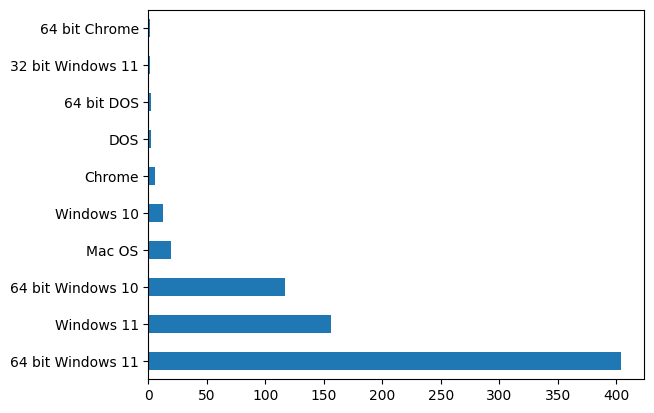

In [55]:
new['Operating System'].value_counts().plot(kind = 'barh')

In [56]:
new.isnull().sum()

Processor             0
RAM                   0
Operating System      0
SSD                  27
Display               0
Warranty             65
HDD                 672
Rating                0
MRP                   0
Generation            0
RAM In GB             0
RAM TYPE              0
dtype: int64

# 5. SSD and HDD

In [57]:
new['SSD'].unique()

array(['256 GB ', '512 GB ', '|256 GB ', '1 TB ', nan, '128 GB ',
       '|512 GB ', 'PCI-e Gen4 ', '|128 GB ', '2 TB '], dtype=object)

In [58]:
dic1 = {'|128 GB ':'128 GB','|512 GB ':'512 GB','|256 GB ':'256 GB','PCI-e Gen4 ':'1 TB',
           '512 GB ':'512 GB', '1 TB ': '1 TB', '256 GB ':'256 GB',
        '128 GB ': '128 GB','2 TB ' : '2 TB'}

In [59]:
new['Feature'] = df['Feature']

In [60]:
for i in range(len(new['SSD'])):
  if new['SSD'][i] in dic1:
    new['SSD'][i] = dic1[new['SSD'][i]]

/var/folders/4d/n5ryh7yn1zg92_n6l1vvp_v80000gn/T/ipykernel_57056/2251021019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['SSD'][i] = dic1[new['SSD'][i]]


In [61]:
new['SSD'].fillna('not present',inplace = True) 

In [62]:
new['SSD'].unique()

array(['256 GB', '512 GB', '1 TB', 'not present', '128 GB', '2 TB'],
      dtype=object)

In [63]:
dic2 = {'256 GB':256, '512 GB' : 512, '1 TB' : 1024, 'not present' : 0, '128 GB': 128, '2 TB': 2048}

In [64]:
for i in range(len(new['SSD'])):
  new['SSD'][i] = dic2[new['SSD'][i]]

/var/folders/4d/n5ryh7yn1zg92_n6l1vvp_v80000gn/T/ipykernel_57056/2286194635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['SSD'][i] = dic2[new['SSD'][i]]


<AxesSubplot: >

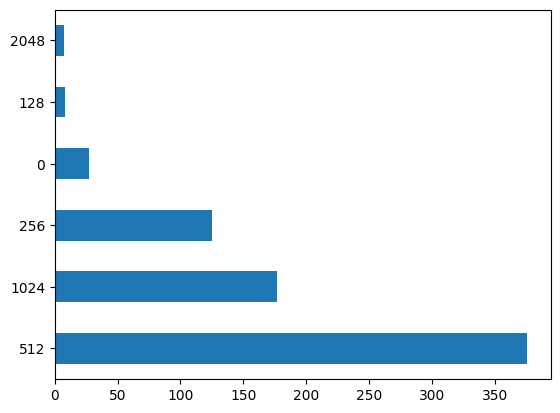

In [65]:
new['SSD'].value_counts().plot(kind = 'barh')

In [66]:
new['HDD'].unique()

array([nan, '1 TB ', '256 GB '], dtype=object)

In [67]:
new['HDD'].value_counts()

1 TB       47
256 GB      1
Name: HDD, dtype: int64

In [68]:
new['HDD'].fillna('not present',inplace = True)

In [69]:
dic3 = {'not present': 0, '1 TB ':1024, '256 GB ':256}

In [70]:
for i in range(len(new['HDD'])):
  new['HDD'][i] = dic3[new['HDD'][i]]

/var/folders/4d/n5ryh7yn1zg92_n6l1vvp_v80000gn/T/ipykernel_57056/3483408814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['HDD'][i] = dic3[new['HDD'][i]]


In [71]:
new['HDD'].unique()

array([0, 1024, 256], dtype=object)

In [72]:
new['SSD'] = new['SSD'].astype('int64')
new['HDD'] = new['HDD'].astype('int64')

In [73]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Processor         720 non-null    object 
 1   RAM               720 non-null    object 
 2   Operating System  720 non-null    object 
 3   SSD               720 non-null    int64  
 4   Display           720 non-null    object 
 5   Warranty          655 non-null    object 
 6   HDD               720 non-null    int64  
 7   Rating            720 non-null    float64
 8   MRP               720 non-null    object 
 9   Generation        720 non-null    object 
 10  RAM In GB         720 non-null    int64  
 11  RAM TYPE          720 non-null    object 
 12  Feature           720 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 73.2+ KB


In [74]:
new['Storage'] = new['HDD'] + new['SSD']

In [75]:
new['Storage'].unique()

array([ 256,  512, 1280, 1024,    0,  128, 1536, 1152, 2048])

In [76]:
new['Storage'].value_counts()

512     375
1024    194
256      98
1280     26
0        10
2048      7
128       6
1536      2
1152      2
Name: Storage, dtype: int64

In [77]:
new[new['Storage'] == 0]

,Processor,RAM,Operating System,SSD,Display,Warranty,HDD,Rating,MRP,Generation,RAM In GB,RAM TYPE,Feature,Storage
83,Qualcomm Snapdragon 7c Gen 2,4 GB LPDDR4X,Windows 11,0,35.56 cm (14 Inch),Office Home and Student 20211 Year Onsite,0,4.40000,"₹32,990",any,4,LPDDR4X,Qualcomm Snapdragon 7c Gen 2 Processor4 GB LPD...,0
89,Intel Celeron Dual Core,4 GB DDR4,Chrome,0,35.56 cm (14 Inch),1 Year Carry-in,0,4.32117,"₹19,490",any,4,DDR4,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,0
96,Intel Celeron Dual Core,4 GB DDR4,Chrome,0,35.56 cm (14 Inch),1 Year Carry-in,0,4.32117,"₹19,490",any,4,DDR4,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,0
345,Intel Celeron Dual Core,4 GB LPDDR4,Chrome,0,29.46 cm (11.6 inch) Touchscreen,1 Year Onsite,0,4.00000,"₹14,990",any,4,LPDDR4,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,0
509,Intel Celeron Dual Core,4 GB LPDDR4,Chrome,0,39.62 cm (15.6 inch) Touchscreen,1 Year Onsite,0,4.00000,"₹24,390",any,4,LPDDR4,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,0
544,Intel Celeron Dual Core,4 GB DDR4,64 bit Windows 11,0,29.46 cm (11.6 Inch),NaN,0,4.50000,"₹21,990",any,4,DDR4,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,0
559,Intel Celeron Dual Core,4 GB DDR4,64 bit Windows 11,0,29.46 cm (11.6 Inch),NaN,0,4.00000,"₹19,990",any,4,DDR4,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,0
632,Intel Celeron Dual Core,4 GB LPDDR4X,64 bit Chrome,0,29.46 cm (11.6 inch) Touchscreen,1 Year Onsite�,0,3.60000,"₹28,490",any,4,LPDDR4X,Intel Celeron Dual Core Processor4 GB LPDDR4X ...,0
695,Intel Celeron Dual Core,4 GB LPDDR4,Chrome,0,35.56 cm (14 inch) Touchscreen,1 Year Onsite,0,4.10000,"₹25,990",any,4,LPDDR4,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,0
715,Intel Celeron Dual Core,4 GB LPDDR4,Chrome,0,29.46 cm (11.6 inch) Touchscreen,1 Year Onsite,0,4.00000,"₹23,490",any,4,LPDDR4,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,0


In [78]:
new[new['Processor'] == 'Intel Celeron Dual Core ']['Storage'].mean() 

128.0

In [79]:
new[new['Storage'] == 0]['Storage'] = 128

/var/folders/4d/n5ryh7yn1zg92_n6l1vvp_v80000gn/T/ipykernel_57056/667537660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new[new['Storage'] == 0]['Storage'] = 128


In [80]:
for i in range(len(new['HDD'])):
  if new['Storage'][i] == 0:
    new['Storage'][i] = 128
    new['HDD'][i] = 128


/var/folders/4d/n5ryh7yn1zg92_n6l1vvp_v80000gn/T/ipykernel_57056/234682818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Storage'][i] = 128
/var/folders/4d/n5ryh7yn1zg92_n6l1vvp_v80000gn/T/ipykernel_57056/234682818.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['HDD'][i] = 128


In [81]:
new[new['Storage']==0]

,Processor,RAM,Operating System,SSD,Display,Warranty,HDD,Rating,MRP,Generation,RAM In GB,RAM TYPE,Feature,Storage


In [82]:
new['Storage'].mean()

653.8666666666667

<AxesSubplot: >

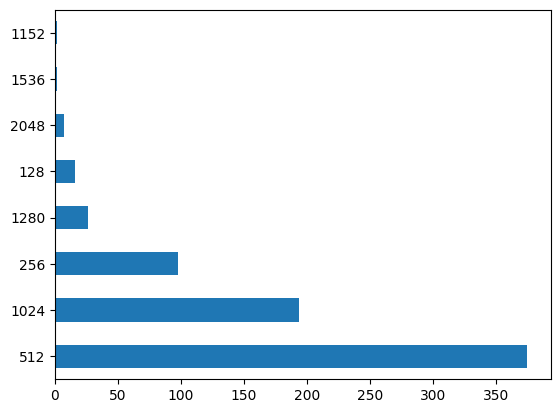

In [83]:
new['Storage'].value_counts().plot(kind = 'barh')

In [84]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Processor         720 non-null    object 
 1   RAM               720 non-null    object 
 2   Operating System  720 non-null    object 
 3   SSD               720 non-null    int64  
 4   Display           720 non-null    object 
 5   Warranty          655 non-null    object 
 6   HDD               720 non-null    int64  
 7   Rating            720 non-null    float64
 8   MRP               720 non-null    object 
 9   Generation        720 non-null    object 
 10  RAM In GB         720 non-null    int64  
 11  RAM TYPE          720 non-null    object 
 12  Feature           720 non-null    object 
 13  Storage           720 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 78.9+ KB


# MRP

In [85]:
new['MRP'].head()

0    ₹36,990
1    ₹39,990
2    ₹32,990
3    ₹49,990
4    ₹49,990
Name: MRP, dtype: object

In [86]:
new['MRP'] = new['MRP'].str.replace('₹', '')
new['MRP'] = new['MRP'].str.replace(',', '')

In [87]:
new['MRP'] = new['MRP'].astype('float')

In [88]:
new["MRP"].head()

0    36990.0
1    39990.0
2    32990.0
3    49990.0
4    49990.0
Name: MRP, dtype: float64

In [89]:
new['MRP'].mean()

81605.8375

In [90]:
new["MRP"].median()

59990.0

In [91]:
new['MRP'].describe()

count       720.000000
mean      81605.837500
std       61552.955102
min       14990.000000
25%       38996.750000
50%       59990.000000
75%       95240.000000
max      434830.000000
Name: MRP, dtype: float64

<AxesSubplot: >

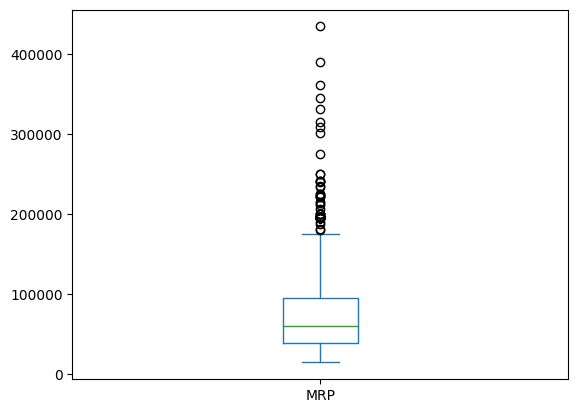

In [92]:
new["MRP"].plot(kind = 'box')

In [93]:
new[new['MRP'] > 300000.0]

,Processor,RAM,Operating System,SSD,Display,Warranty,HDD,Rating,MRP,Generation,RAM In GB,RAM TYPE,Feature,Storage
162,Apple M1 Max,32 GB Unified Memory,Mac OS,1024,41.15 cm (16.2 inch),"iMovie, Siri, GarageBand, Pages, Numbers, Phot...",0,4.30000,309490.0,any,32,UnifiedMemory,Apple M1 Max Processor32 GB Unified Memory RAM...,1024
375,Intel Core i9,32 GB DDR5,64 bit Windows 11,1024,39.62 cm (15.6 inch),1 Year Onsite,0,5.00000,301990.0,12th Gen,32,DDR5,Intel Core i9 Processor (12th Gen)32 GB DDR5 R...,1024
464,Intel Core i9,32 GB DDR5,64 bit Windows 11,2048,43.94 cm (17.3 Inch),2 Year On-Site & Carry-In,0,4.32117,389990.0,12th Gen,32,DDR5,Intel Core i9 Processor (12th Gen)32 GB DDR5 R...,2048
597,Intel Core i7,32 GB DDR5,64 bit Windows 11,2048,43.94 cm (17.3 inch),NaN,0,4.32117,314990.0,12th Gen,32,DDR5,Intel Core i7 Processor (12th Gen)32 GB DDR5 R...,2048
602,Intel Core i9,32 GB DDR5,64 bit Windows 11,2048,40.64 cm (16 Inch),1 Year Onsite,0,4.32117,331990.0,12th Gen,32,DDR5,Intel Core i9 Processor (12th Gen)32 GB DDR5 R...,2048
614,AMD Ryzen 9 Octa Core,32 GB DDR5,64 bit Windows 11,2048,40.64 cm (16 Inch),1 Year Onsite,0,4.32117,361990.0,any,32,DDR5,AMD Ryzen 9 Octa Core Processor32 GB DDR5 RAM6...,2048
625,Intel Core i9,32 GB DDR4,64 bit Windows 11,1024,43.94 cm (17.3 Inch),NaN,0,4.32117,434830.0,11th Gen,32,DDR4,Intel Core i9 Processor (11th Gen)32 GB DDR4 R...,1024
628,Intel Core i9,32 GB DDR4,64 bit Windows 10,1024,39.62 cm (15.6 inch),Microsoft Office Home and Student 20191 Year L...,0,4.60000,345390.0,10th Gen,32,DDR4,NVIDIA GeForce RTX 2080 with Max-Q15.6 inch Fu...,1024


<AxesSubplot: ylabel='Density'>

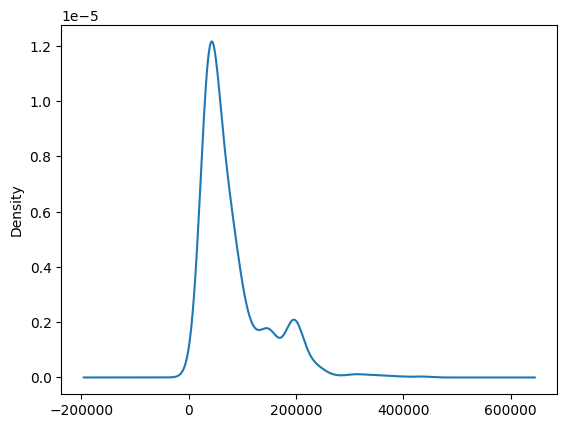

In [94]:
new['MRP'].plot(kind = 'kde')

In [95]:
# There are outliers but we can not delete them , i won't help perdict the price 

# Display

In [96]:
new['Display'].unique()

array(['35.56 cm (14 inch) ', '39.62 cm (15.6 inch) ',
       '39.62 cm (15.6 Inch) ', '43.94 cm (17.3 Inch) ',
       '33.78 cm (13.3 inch) ', '35.56 cm (14 Inch) Touchscreen ',
       '35.56 cm (14 Inch) ', '33.78 cm (13.3 Inch) ',
       '36.07 cm (14.2 inch) ', '34.54 cm (13.6 Inch) ',
       '40.64 cm (16 inch) ', '35.56 cm (14 inch) Touchscreen ',
       '88.9 cm (35 cm) ', '40.89 cm (16.1 inch) ',
       '41.15 cm (16.2 inch) ', '43.94 cm (17.3 inch) ',
       '35.81 cm (14.1 inch) ', '33.78 cm (13.3 inch) Touchscreen ',
       '40.64 cm (16 Inch) ', '39.62 cm (15.6 inches) ',
       '33.78 cm (13.3 Inch) Touchscreen ',
       '34.04 cm (13.4 Inch) Touchscreen ',
       '29.46 cm (11.6 inch) Touchscreen ', '38.1 cm (15 inch) ',
       '33.02 cm (13 inch) ', '38.0 cm (14.96 Inch) ',
       '34.29 cm (13.5 inch) ', '35.56 cm (14 inches) ', 'Matrix ',
       '?SHIFT?Matrix ', '29.46 cm (11.6 inch) ', '40.89 cm (16.1 Inch) ',
       '29.46 cm (11.6 Inch) Touchscreen ',
       '39.62

In [97]:
dic = {'35.56 cm (14 inch) ':['14 inch',False], '39.62 cm (15.6 inch) ':['15.6 inch',False],
       '39.62 cm (15.6 Inch) ':['15.6 Inch',False], '43.94 cm (17.3 Inch) ':['17.3 Inch',False],
       '33.78 cm (13.3 inch) ':['13.3 inch',False], '35.56 cm (14 Inch) Touchscreen ':['14 Inch',True],
       '35.56 cm (14 Inch) ':['14 Inch',False], '33.78 cm (13.3 Inch) ':['13.3 Inch',False],
       '36.07 cm (14.2 inch) ':['14.2 inch',False], '34.54 cm (13.6 Inch) ':['13.6 Inch',False],
       '40.64 cm (16 inch) ':['16 inch',False], '35.56 cm (14 inch) Touchscreen ':['14 inch',True],
       '88.9 cm (35 cm) ':['35 inch',False], '40.89 cm (16.1 inch) ':['16.1 inch',False],
       '41.15 cm (16.2 inch) ':['16.2 inch',False], '43.94 cm (17.3 inch) ':['17.3 inch',False],
       '35.81 cm (14.1 inch) ':['14.1 inch',False], '33.78 cm (13.3 inch) Touchscreen ':['13.3 inch',True],
       '40.64 cm (16 Inch) ':['16 Inch',False], '39.62 cm (15.6 inches) ':['15.6 inches',False],
       '33.78 cm (13.3 Inch) Touchscreen ':['13.3 Inch',True],
       '34.04 cm (13.4 Inch) Touchscreen ':['13.4 Inch',True],
       '29.46 cm (11.6 inch) Touchscreen ':['11.6 inch',True], '38.1 cm (15 inch) ':['15 inch',False],
       '33.02 cm (13 inch) ':['13 inch',False], '38.0 cm (14.96 Inch) ':['14.96 Inch',False],
       '34.29 cm (13.5 inch) ':['13.5 inch',False], '35.56 cm (14 inches) ':['14 inches',False], 'Matrix ':['Matrix',False],
       '?SHIFT?Matrix ':['Matrix',False], '29.46 cm (11.6 inch) ':['11.6 inch',False], '40.89 cm (16.1 Inch) ':['16.1 Inch',False],
       '29.46 cm (11.6 Inch) Touchscreen ':['11.6 Inch',True],
       '39.62 cm (15.6 inch) Touchscreen ':['15.6 inch',True], '42.16 cm (16.6 inch) ':['16.6 inch',False],
       '29.46 cm (11.6 Inch) ':['11.6 Inch',False], '40.64 cm (16 Inch) Touchscreen ':['16 Inch',True],
       'SHIFT, SteelSeries Engine 3, Matrix ':['Matrix',False]}

In [98]:
# new['Display'] = dic[new['Display']

In [99]:
for i in range(len(new['Display'])):
  new['Display'][i] = dic[new['Display'][i]]

/var/folders/4d/n5ryh7yn1zg92_n6l1vvp_v80000gn/T/ipykernel_57056/3676539271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Display'][i] = dic[new['Display'][i]]


In [100]:
new['Display'].isnull().sum()

0

In [101]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Processor         720 non-null    object 
 1   RAM               720 non-null    object 
 2   Operating System  720 non-null    object 
 3   SSD               720 non-null    int64  
 4   Display           720 non-null    object 
 5   Warranty          655 non-null    object 
 6   HDD               720 non-null    int64  
 7   Rating            720 non-null    float64
 8   MRP               720 non-null    float64
 9   Generation        720 non-null    object 
 10  RAM In GB         720 non-null    int64  
 11  RAM TYPE          720 non-null    object 
 12  Feature           720 non-null    object 
 13  Storage           720 non-null    int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 78.9+ KB


In [102]:
new["Touch Display"] = ' '

In [103]:
for i in new["Touch Display"].index:
  new["Touch Display"][i] = new['Display'][i][1]

/var/folders/4d/n5ryh7yn1zg92_n6l1vvp_v80000gn/T/ipykernel_57056/39730893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new["Touch Display"][i] = new['Display'][i][1]


In [104]:
for i in new["Display"].index:
  if new["Display"][i][0] == 'Matrix':
    new["Display"][i] = None
    continue
  new["Display"][i] = new['Display'][i][0]
  

/var/folders/4d/n5ryh7yn1zg92_n6l1vvp_v80000gn/T/ipykernel_57056/3910857016.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new["Display"][i] = new['Display'][i][0]
/var/folders/4d/n5ryh7yn1zg92_n6l1vvp_v80000gn/T/ipykernel_57056/3910857016.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new["Display"][i] = None


In [105]:
new["Display"]

0        14 inch
1      15.6 inch
2      15.6 inch
3      15.6 inch
4      15.6 inch
         ...    
715    11.6 inch
716    15.6 inch
717    15.6 inch
718      14 inch
719    15.6 inch
Name: Display, Length: 720, dtype: object

In [106]:
new['Display'].replace('inches','inch')

0        14 inch
1      15.6 inch
2      15.6 inch
3      15.6 inch
4      15.6 inch
         ...    
715    11.6 inch
716    15.6 inch
717    15.6 inch
718      14 inch
719    15.6 inch
Name: Display, Length: 720, dtype: object

In [107]:
new['Display'].unique()

array(['14 inch', '15.6 inch', '15.6 Inch', '17.3 Inch', '13.3 inch',
       '14 Inch', '13.3 Inch', '14.2 inch', '13.6 Inch', '16 inch',
       '35 inch', '16.1 inch', '16.2 inch', '17.3 inch', '14.1 inch',
       '16 Inch', '15.6 inches', '13.4 Inch', '11.6 inch', '15 inch',
       '13 inch', '14.96 Inch', '13.5 inch', '14 inches', None,
       '16.1 Inch', '11.6 Inch', '16.6 inch'], dtype=object)

In [108]:
for i in new["Display"].index:
  if new["Display"][i] and "inches" not in new["Display"][i]:
    new["Display"][i] = float(new['Display'][i][:-4])

  elif new["Display"][i] and "inches" in new["Display"][i]:
    new["Display"][i] = float(new['Display'][i][:-6])

/var/folders/4d/n5ryh7yn1zg92_n6l1vvp_v80000gn/T/ipykernel_57056/4105016805.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new["Display"][i] = float(new['Display'][i][:-4])
/var/folders/4d/n5ryh7yn1zg92_n6l1vvp_v80000gn/T/ipykernel_57056/4105016805.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new["Display"][i] = float(new['Display'][i][:-6])


In [109]:
new['Display'].median()

15.6

In [110]:
new["Display"] = new["Display"].fillna(15.6)

In [111]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Processor         720 non-null    object 
 1   RAM               720 non-null    object 
 2   Operating System  720 non-null    object 
 3   SSD               720 non-null    int64  
 4   Display           720 non-null    float64
 5   Warranty          655 non-null    object 
 6   HDD               720 non-null    int64  
 7   Rating            720 non-null    float64
 8   MRP               720 non-null    float64
 9   Generation        720 non-null    object 
 10  RAM In GB         720 non-null    int64  
 11  RAM TYPE          720 non-null    object 
 12  Feature           720 non-null    object 
 13  Storage           720 non-null    int64  
 14  Touch Display     720 non-null    object 
dtypes: float64(3), int64(4), object(8)
memory usage: 84.5+ KB


In [112]:
new.head()

,Processor,RAM,Operating System,SSD,Display,Warranty,HDD,Rating,MRP,Generation,RAM In GB,RAM TYPE,Feature,Storage,Touch Display
0,Intel Core i3,8 GB DDR4,64 bit Windows 11,256,14.0,Office Home and Student 20212 Year Onsite�,0,4.2,36990.0,11th Gen,8,DDR4,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,256,False
1,Intel Core i3,8 GB DDR4,64 bit Windows 11,512,15.6,Office Home and Student 20212 Year Onsite�,0,4.2,39990.0,11th Gen,8,DDR4,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,512,False
2,Intel Core i3,8 GB DDR4,64 bit Windows 11,512,15.6,Office Home and Student 20211 Year Onsite,0,4.3,32990.0,10th Gen,8,DDR4,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,512,False
3,AMD Ryzen 5 Hexa Core,8 GB DDR4,64 bit Windows 10,512,15.6,"HP Documentation, HP e-service, HP BIOS Recove...",0,4.4,49990.0,any,8,DDR4,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,512,False
4,Intel Core i5,8 GB DDR4,Windows 11,512,15.6,1 Year Onsite,0,4.4,49990.0,10th Gen,8,DDR4,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,512,False


In [113]:
new['Operating System'].unique()

array(['64 bit Windows 11', '64 bit Windows 10', 'Windows 11', 'Mac OS',
       'DOS', 'Windows 10', 'Chrome', '32 bit Windows 11', '64 bit DOS',
       '64 bit Chrome'], dtype=object)

# Warranty

In [114]:
new['Warranty']

0             Office Home and Student 20212 Year Onsite�
1             Office Home and Student 20212 Year Onsite�
2             Office Home and Student 20211 Year Onsite 
3      HP Documentation, HP e-service, HP BIOS Recove...
4                                         1 Year Onsite 
                             ...                        
715                                       1 Year Onsite 
716                                       1 Year Onsite�
717                                       1 Year Onsite 
718                                       1 Year Onsite 
719    Microsoft Office Home and Student 20191 Year O...
Name: Warranty, Length: 720, dtype: object

In [115]:
import re
arr = []
new['Warranty'] = new['Warranty'].fillna('')
for i in new['Warranty'].index:
  arr.append(re.sub("[^0-9]", "", new["Warranty"][i]))


In [116]:
for i in range(len(arr)):
  if arr[i] == '':
    arr[i] = 0
  else:
    arr[i] = int(arr[i][-1])

In [117]:
len(arr)

720

In [118]:
for i in new['Warranty'].index:
  new['Warranty'][i] = arr[i]

/var/folders/4d/n5ryh7yn1zg92_n6l1vvp_v80000gn/T/ipykernel_57056/2532917316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['Warranty'][i] = arr[i]


In [119]:
new['Warranty'].unique()

array([2, 1, 0, 3, 6], dtype=object)

In [120]:
new["Warranty"] =pd.to_numeric(new["Warranty"])

<AxesSubplot: >

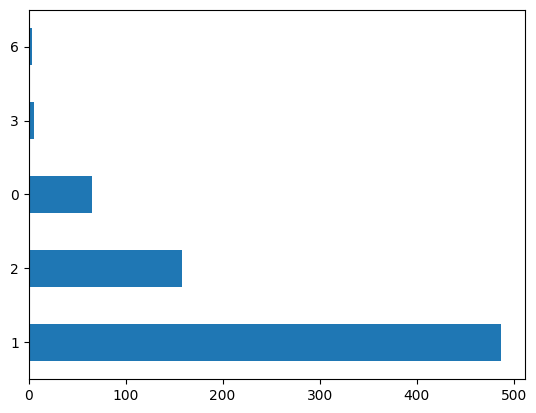

In [121]:
new["Warranty"].value_counts().plot(kind = 'barh')

In [122]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Processor         720 non-null    object 
 1   RAM               720 non-null    object 
 2   Operating System  720 non-null    object 
 3   SSD               720 non-null    int64  
 4   Display           720 non-null    float64
 5   Warranty          720 non-null    int64  
 6   HDD               720 non-null    int64  
 7   Rating            720 non-null    float64
 8   MRP               720 non-null    float64
 9   Generation        720 non-null    object 
 10  RAM In GB         720 non-null    int64  
 11  RAM TYPE          720 non-null    object 
 12  Feature           720 non-null    object 
 13  Storage           720 non-null    int64  
 14  Touch Display     720 non-null    object 
dtypes: float64(3), int64(5), object(7)
memory usage: 84.5+ KB


# MRP

In [123]:
new['MRP'].mean()

81605.8375

In [124]:
new['MRP'].median()

59990.0

<AxesSubplot: >

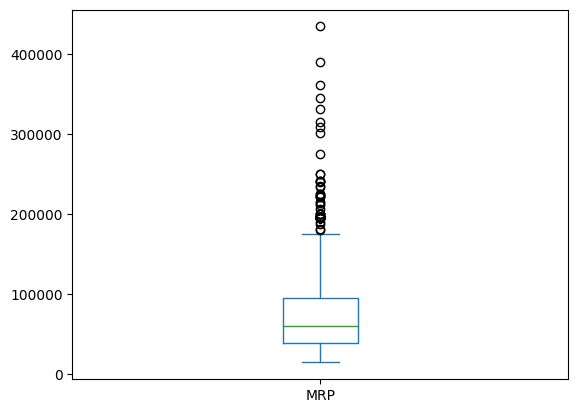

In [125]:
new['MRP'].plot(kind = 'box')

In [126]:
new['MRP'].describe()

count       720.000000
mean      81605.837500
std       61552.955102
min       14990.000000
25%       38996.750000
50%       59990.000000
75%       95240.000000
max      434830.000000
Name: MRP, dtype: float64

In [127]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Processor         720 non-null    object 
 1   RAM               720 non-null    object 
 2   Operating System  720 non-null    object 
 3   SSD               720 non-null    int64  
 4   Display           720 non-null    float64
 5   Warranty          720 non-null    int64  
 6   HDD               720 non-null    int64  
 7   Rating            720 non-null    float64
 8   MRP               720 non-null    float64
 9   Generation        720 non-null    object 
 10  RAM In GB         720 non-null    int64  
 11  RAM TYPE          720 non-null    object 
 12  Feature           720 non-null    object 
 13  Storage           720 non-null    int64  
 14  Touch Display     720 non-null    object 
dtypes: float64(3), int64(5), object(7)
memory usage: 84.5+ KB


In [128]:
# New Feature 
res = []
for i in df['Product'].index:
  arr = df['Product'][i].split()
  res.append(arr[0])

new['Company'] = pd.DataFrame(res)

In [129]:
# New Feature 

arr1 = ['Core', 'Ryzen' , 'Intel' ,'Thin' , 'Slim','HP', '(2022)','2021']
res = []
for i in df['Product'].index:
  arr = df['Product'][i].split()
  ans = ''
  if arr[1] not in arr1:
    ans += arr[1]
  if arr[2] not in arr1:
    ans+= arr[2]
  
  res.append(ans)

new['Product Name'] = pd.DataFrame(res)

# Bivariate Analysis

In [130]:
# MRP Vs RAM

In [131]:
import seaborn as sns

In [132]:
sns.set(rc={'figure.figsize':(20,10)})

<AxesSubplot: xlabel='MRP', ylabel='RAM TYPE'>

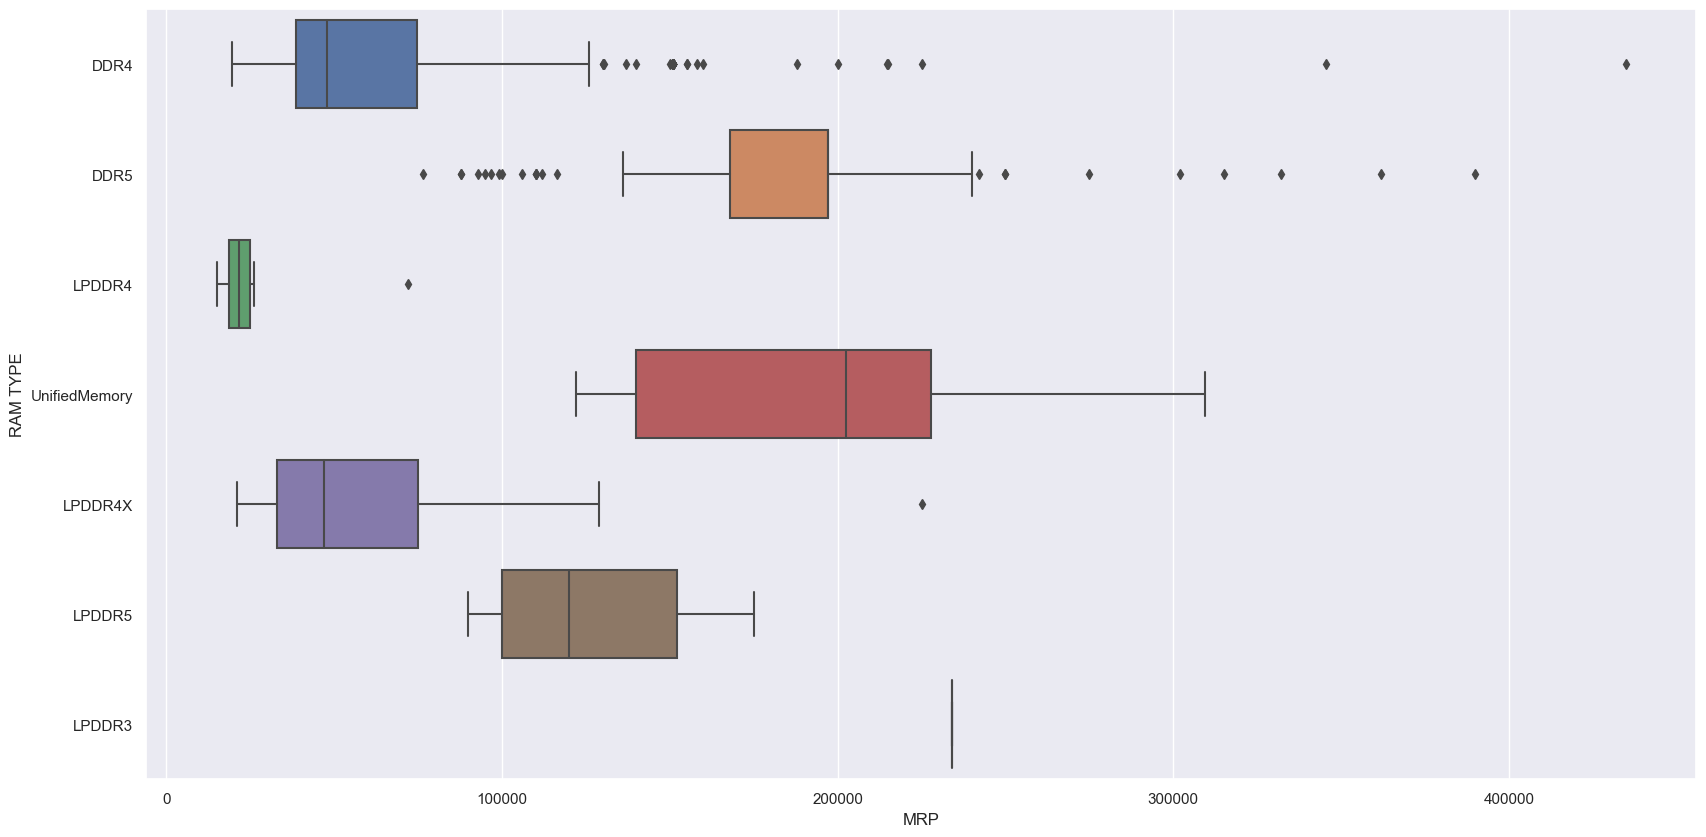

In [133]:
sns.boxplot(x='MRP',y='RAM TYPE',data=new)

In [134]:
new["RAM In GB"].unique()

array([ 8, 16,  4, 32])

<AxesSubplot: xlabel='RAM In GB', ylabel='MRP'>

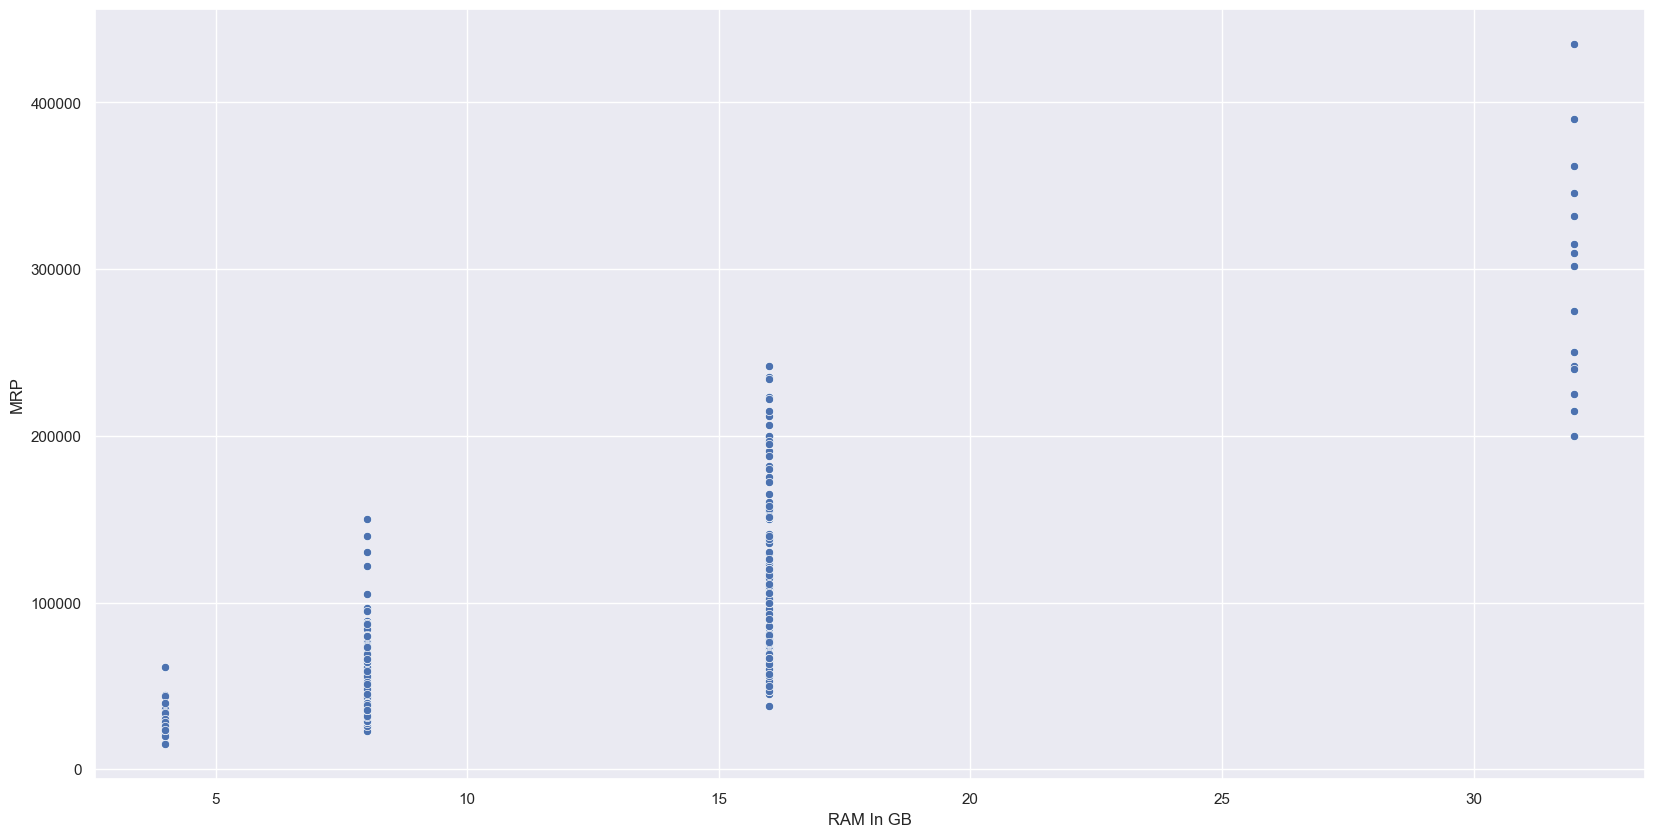

In [135]:
sns.scatterplot(x='RAM In GB', y="MRP" , data = new)

In [136]:
# Calculating the covariance 
covariance = new['MRP'].cov(new['RAM In GB'])
print(covariance)

257808.32844228114


SSD vs MRP

<AxesSubplot: xlabel='SSD', ylabel='MRP'>

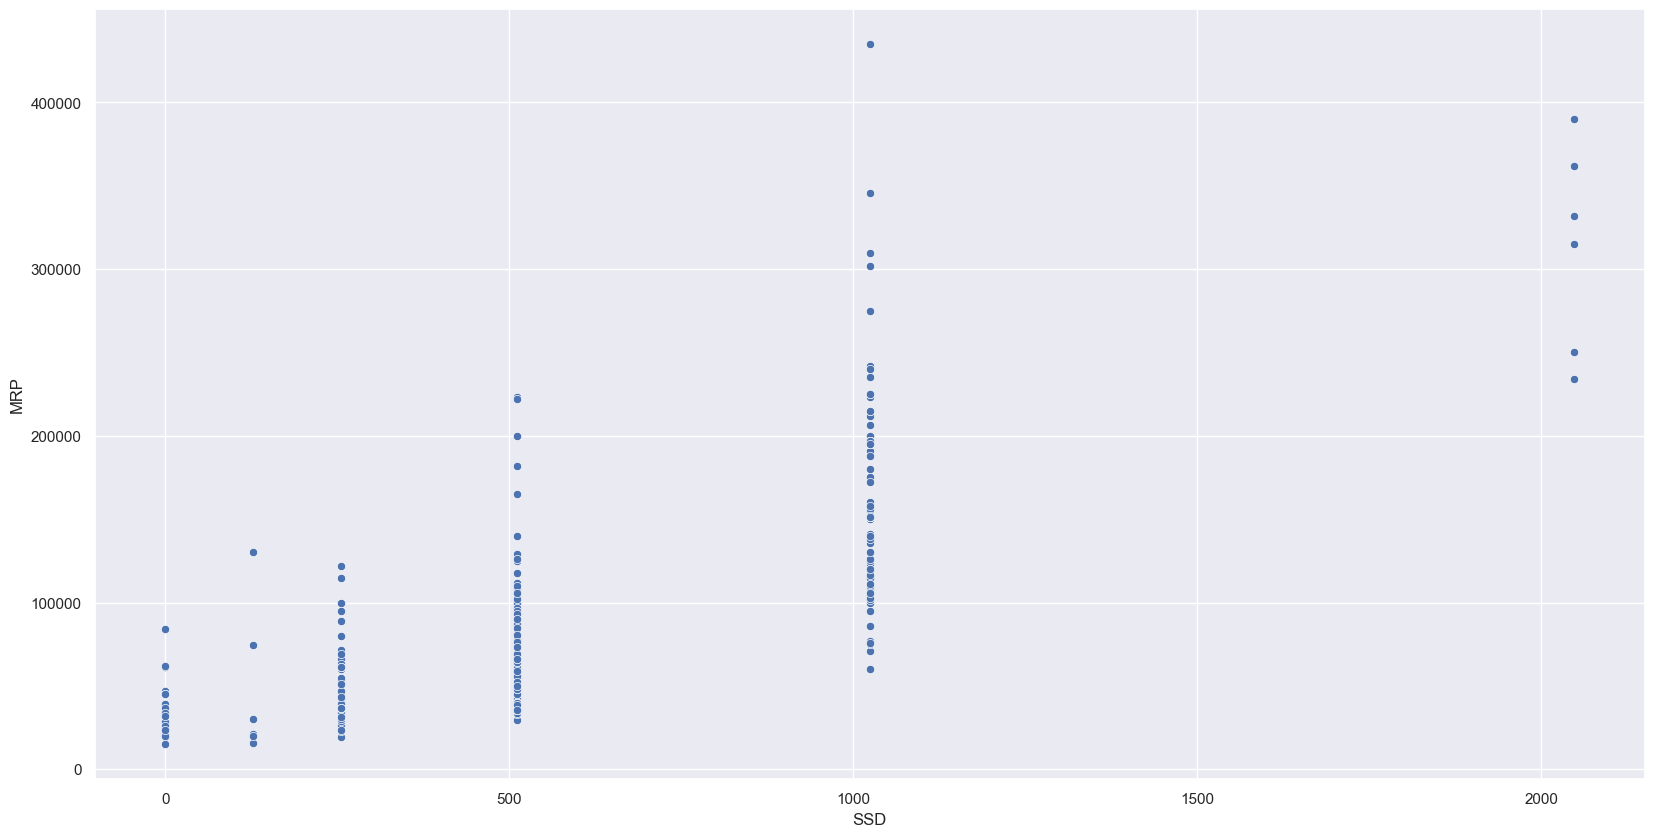

In [137]:
sns.scatterplot(x='SSD', y="MRP" , data = new)

In [138]:
# Calculating the covariance 
covariance = new['MRP'].cov(new['SSD'])
print(covariance)

15469435.482614752


HDD vs MRP

<AxesSubplot: xlabel='HDD', ylabel='MRP'>

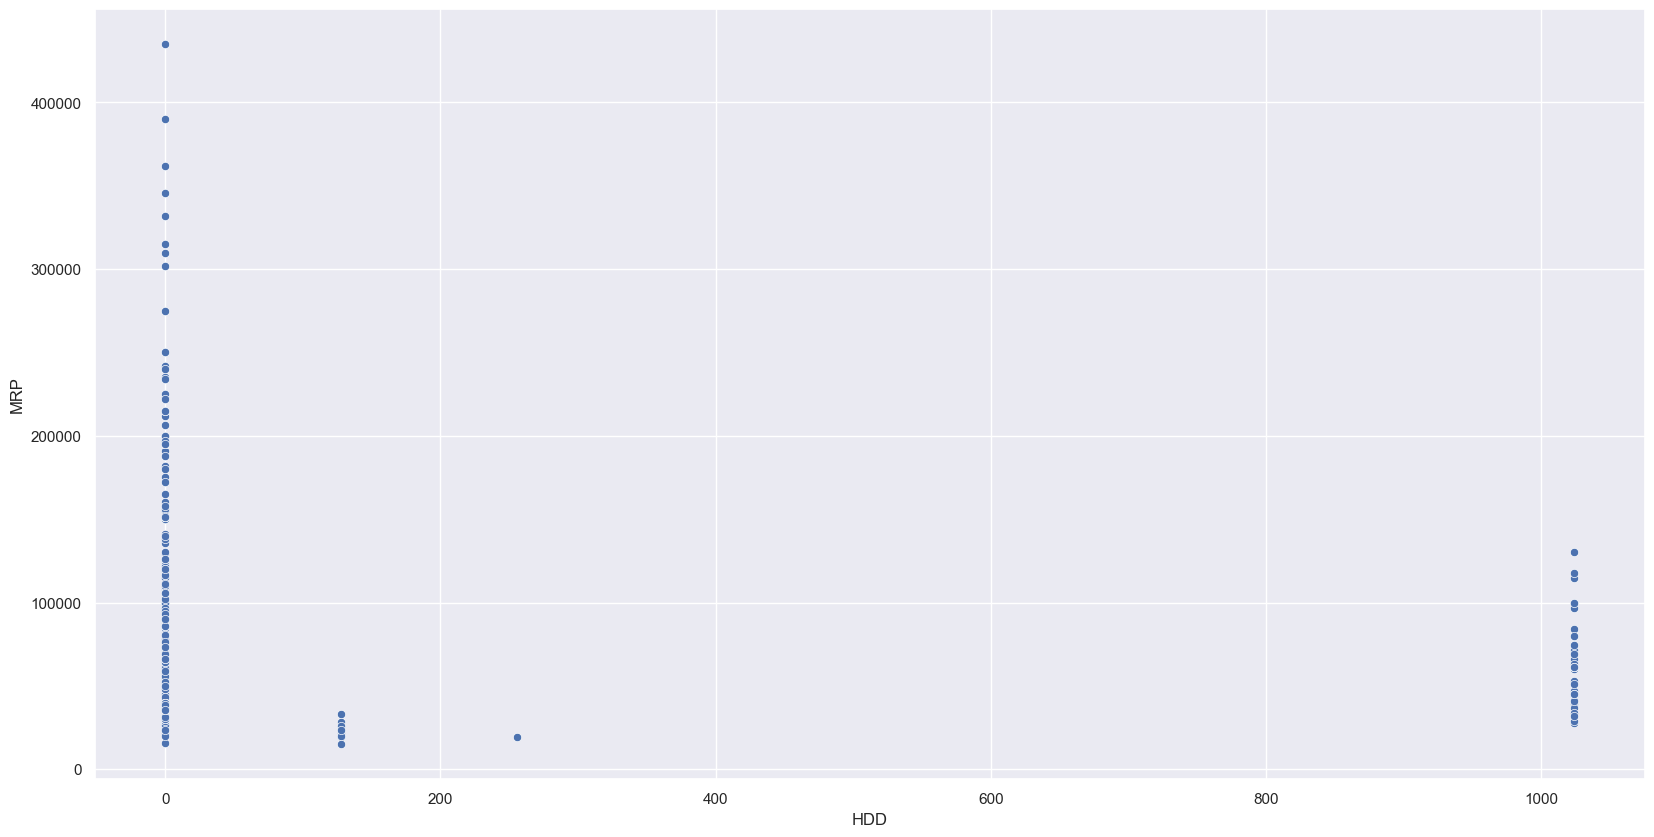

In [139]:
sns.scatterplot(x='HDD', y="MRP" , data = new)

In [140]:
# Calculating the covariance 
covariance = new['MRP'].cov(new['HDD'])
print(covariance)

-1630726.5780250346


In [141]:
# The Price will not increase with HDD as if HDD is not Present the device will have SDD.

In [142]:
# Try to ignore HDD feature in model

In [143]:
# Calculating the covariance 
covariance = new['MRP'].cov(new['Storage'])
print(covariance)

13838708.904589703


In [144]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Processor         720 non-null    object 
 1   RAM               720 non-null    object 
 2   Operating System  720 non-null    object 
 3   SSD               720 non-null    int64  
 4   Display           720 non-null    float64
 5   Warranty          720 non-null    int64  
 6   HDD               720 non-null    int64  
 7   Rating            720 non-null    float64
 8   MRP               720 non-null    float64
 9   Generation        720 non-null    object 
 10  RAM In GB         720 non-null    int64  
 11  RAM TYPE          720 non-null    object 
 12  Feature           720 non-null    object 
 13  Storage           720 non-null    int64  
 14  Touch Display     720 non-null    object 
 15  Company           720 non-null    object 
 16  Product Name      720 non-null    object 
dt

In [145]:
new["Touch Display"] = new["Touch Display"].astype('bool')

Display vs MRP

In [146]:
# Calculating the covariance 
covariance = new['MRP'].cov(new['Display'])
print(covariance) 

12361.591009735756


<AxesSubplot: xlabel='Display', ylabel='MRP'>

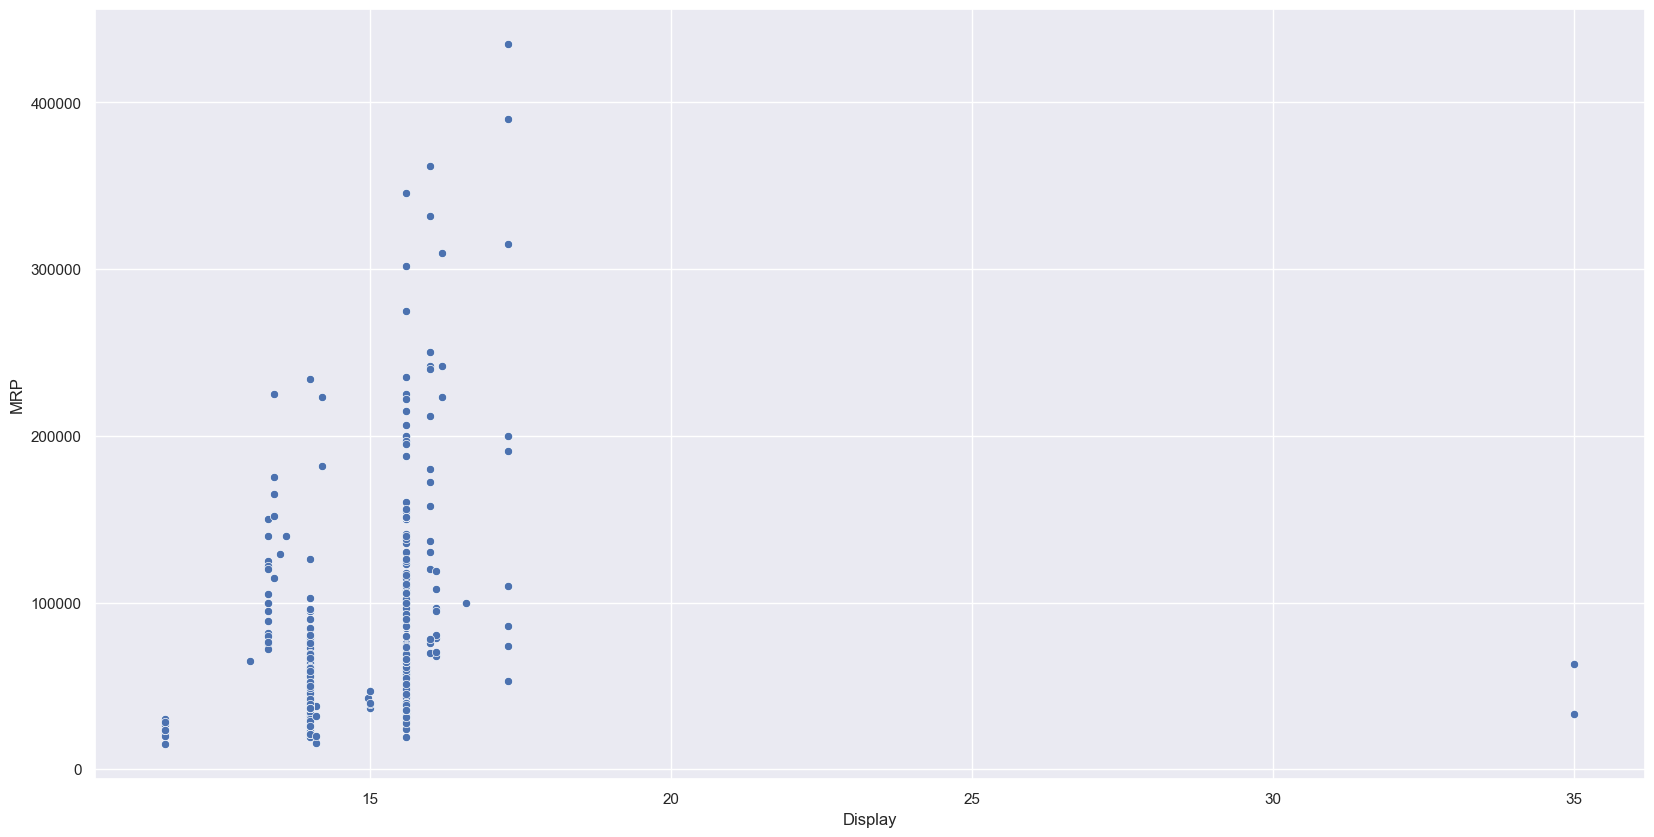

In [147]:
sns.scatterplot(x='Display', y="MRP" , data = new)

In [148]:
for i in new["Touch Display"].index:
  if new["Touch Display"][i]:
    new["Touch Display"][i] = 1
  else:
    new["Touch Display"][i] = 0

/var/folders/4d/n5ryh7yn1zg92_n6l1vvp_v80000gn/T/ipykernel_57056/706082368.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new["Touch Display"][i] = 0


In [149]:
new["Touch Display"].unique()

array([0, 1], dtype=object)

In [150]:
new["Touch Display"] = new["Touch Display"].astype('int')

In [151]:
# Calculating the covariance 
covariance = new['MRP'].cov(new['Touch Display'])
print(covariance) 

631.1089534075106


In [152]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Processor         720 non-null    object 
 1   RAM               720 non-null    object 
 2   Operating System  720 non-null    object 
 3   SSD               720 non-null    int64  
 4   Display           720 non-null    float64
 5   Warranty          720 non-null    int64  
 6   HDD               720 non-null    int64  
 7   Rating            720 non-null    float64
 8   MRP               720 non-null    float64
 9   Generation        720 non-null    object 
 10  RAM In GB         720 non-null    int64  
 11  RAM TYPE          720 non-null    object 
 12  Feature           720 non-null    object 
 13  Storage           720 non-null    int64  
 14  Touch Display     720 non-null    int64  
 15  Company           720 non-null    object 
 16  Product Name      720 non-null    object 
dt

MRP vs Rating

In [153]:
# Calculating the covariance 
covariance = new['MRP'].cov(new['Rating'])
print(covariance) 

5443.351411527302


<AxesSubplot: xlabel='Rating', ylabel='MRP'>

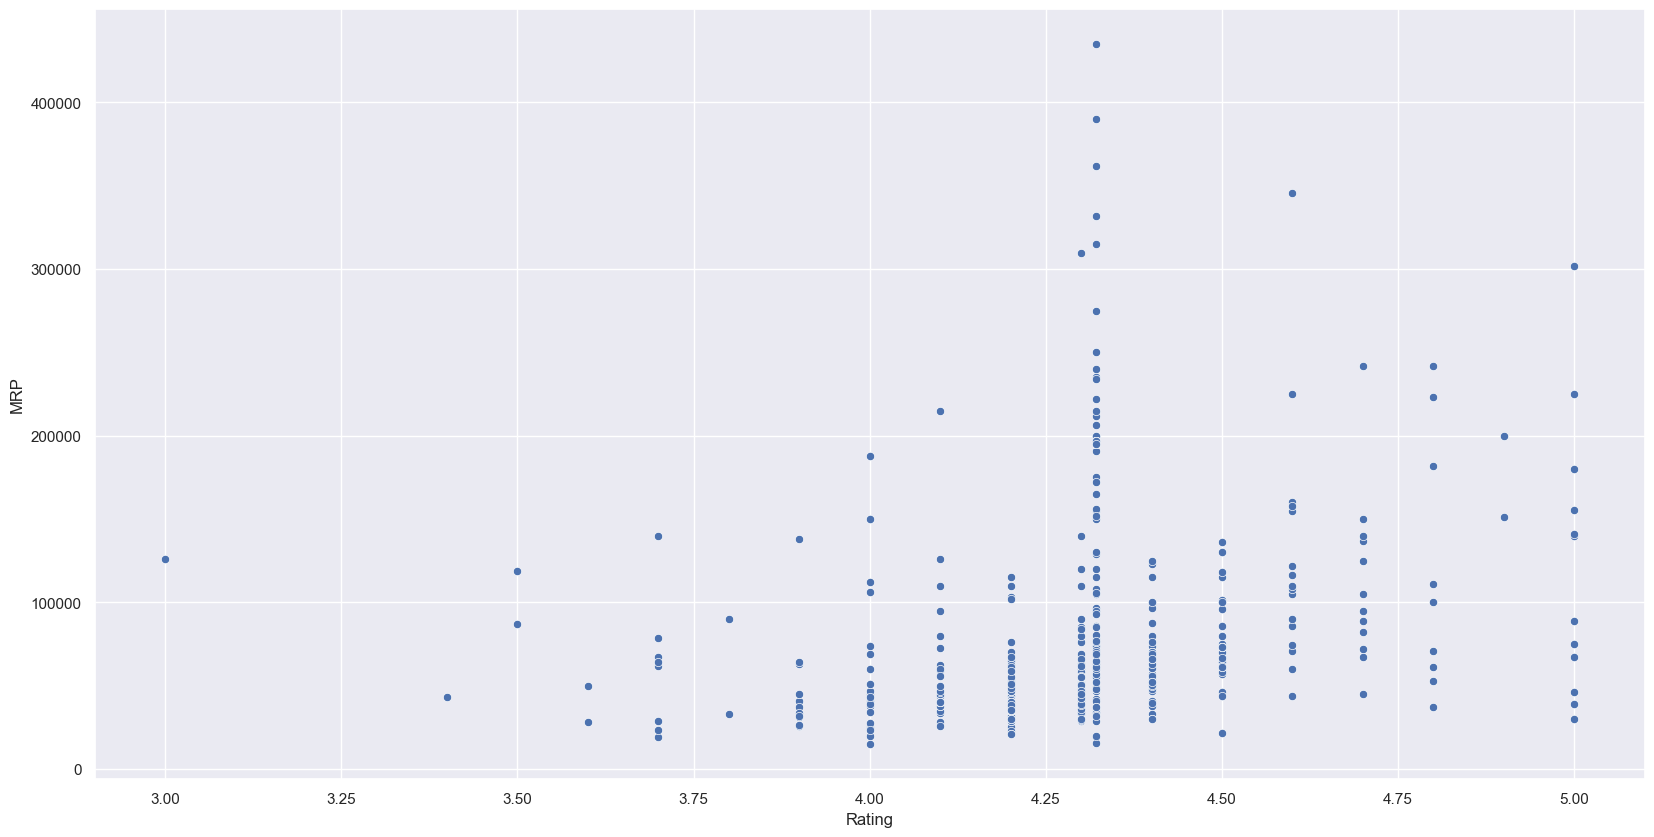

In [154]:
sns.scatterplot(x='Rating', y="MRP" , data = new)

In [155]:
# It doesn't effect the Price much and can be ignored

In [156]:
new1 = new.copy()
new1 = new1[new1["MRP"] < 30000]

In [157]:
new1.shape

(39, 17)

# Model 

In [158]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


X = new[['Processor', 'Operating System', 'SSD', 'Display', 'Warranty', 'Generation', 'HDD', 'RAM In GB', 'RAM TYPE', 'Storage', 'Touch Display']]
y = new['MRP']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )



# Encode categorical variables using LabelEncoder
le_processor = LabelEncoder()
le_os = LabelEncoder()
le_gen = LabelEncoder()
le_ram_type = LabelEncoder()

le_processor.fit(new['Processor'])
le_os.fit(new['Operating System'])
le_gen.fit(new['Generation'])
le_ram_type.fit(new['RAM TYPE'])


X_train['Processor'] = le_processor.transform(X_train['Processor'])
X_train['Operating System'] = le_os.transform(X_train['Operating System'])
X_train['Generation'] = le_gen.transform(X_train['Generation'])
X_train['RAM TYPE'] = le_ram_type.transform(X_train['RAM TYPE'])


X_test['Processor'] = le_processor.transform(X_test['Processor'])
X_test['Operating System'] = le_os.transform(X_test['Operating System'])
X_test['Generation'] = le_gen.transform(X_test['Generation'])
X_test['RAM TYPE'] = le_ram_type.transform(X_test['RAM TYPE'])

# Create a column transformer for scaling numerical variables
ct = make_column_transformer((StandardScaler(), ['SSD', 'Display', 'Warranty', 'HDD', 'RAM In GB', 'Storage']), remainder='passthrough')

# Create a pipeline for pre-processing and modeling
rf = RandomForestRegressor(n_estimators=100)
model = make_pipeline(ct, rf)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict laptop prices on the testing data
y_pred = model.predict(X_test)

# Calculate mean absolute error on the testing data
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 7129.558712374392


In [165]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [168]:
import joblib
joblib.dump(le_processor, 'le_processor.pkl')
joblib.dump(le_os, 'le_os.pkl')
joblib.dump(le_gen, 'le_gen.pkl')
joblib.dump(le_ram_type, 'le_ram_type.pkl')

['le_ram_type.pkl']

In [159]:
data = new.copy()

In [160]:
import numpy as np

def input_data(X):
  X['Processor'] = le_processor.transform(X['Processor'])
  X['Operating System'] = le_os.transform(X['Operating System'])
  X['Generation'] = le_gen.transform(X['Generation'])
  X['RAM TYPE'] = le_ram_type.transform(X['RAM TYPE'])
  return model.predict(X)

p = data.iloc[[18]]
input_data(pd.DataFrame(p)),data['MRP'][18]

(array([55278.16131785]), 47990.0)

In [161]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from xgboost import XGBRegressor



# Define features and target
X = new[['Processor', 'Operating System', 'SSD', 'Display', 'Warranty', 'Company', 'Product Name',
         'Generation', 'HDD', 'RAM TYPE', "RAM In GB", 'Storage', 'Touch Display']]
y = new['MRP']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define preprocessing pipeline
num_transformer = StandardScaler()

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, ['SSD', 'Display', 'HDD', 'Warranty' ,'RAM In GB', 'Storage']),
        ('cat', cat_transformer, ['Processor', 'Operating System', 'Generation', 'Company','RAM TYPE', 'Touch Display' , "Product Name"])
    ])

# Define model pipeline
model1 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=100))])

model2 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', XGBRegressor())])
# Fit the model on the training data
model1.fit(X_train, y_train)

model2.fit(X_train, y_train)
# Predict laptop prices on the testing data
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
# Calculate mean absolute error on the testing data
mae1 = mean_absolute_error(y_test, y_pred1)
mae2 = mean_absolute_error(y_test, y_pred2)
print(f"Mean Absolute Error: {mae1,mae2}")


Mean Absolute Error: (8888.847223350933, 9082.73040093316)


In [162]:
model2.predict(data.iloc[[140]]),data['MRP'][140]

(array([60004.418], dtype=float32), 58899.0)

In [163]:
import joblib

# Save the model to a file
model_filename = 'model2.pkl'
joblib.dump(model2, model_filename)

['model2.pkl']

In [166]:
from sklearn.pipeline import Pipeline

# Save the entire pipeline to a file
with open('model2.pkl', 'wb') as file:
    pickle.dump(model, file)


In [152]:
model4 = joblib.load('model2.pkl')

In [149]:
model4.predict(data.iloc[[140]])

array([59548.414], dtype=float32)

In [150]:
data.iloc[[0]]

,Processor,RAM,Operating System,SSD,Display,Warranty,HDD,Rating,MRP,Generation,RAM In GB,RAM TYPE,Feature,Storage,Touch Display,Company,Product Name
0,Intel Core i3,8 GB DDR4,64 bit Windows 11,256,14.0,2,0,4.2,36990.0,11th Gen,8,DDR4,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,256,False,Lenovo,IdeaPad3


In [147]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense


# Load data
data = new

# Prepare data
X = data[['Processor', 'Operating System', 'SSD', 'Display', 'Warranty', 'Generation', 'RAM In GB', 'RAM TYPE', 'Storage', 'Touch Display','Company']]
y = data['MRP']

# Encode categorical variables using LabelEncoder
le_processor = LabelEncoder()
le_os = LabelEncoder()
le_gen = LabelEncoder()
le_ram_type = LabelEncoder()

le_processor.fit(data['Processor'])
le_os.fit(data['Operating System'])
le_gen.fit(data['Generation'])
le_ram_type.fit(data['RAM TYPE'])


X['Processor'] = le_processor.transform(X['Processor'])
X['Operating System'] = le_os.transform(X['Operating System'])
X['Generation'] = le_gen.transform(X['Generation'])
X['RAM TYPE'] = le_ram_type.transform(X['RAM TYPE'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Fit the model on the training data
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

# Predict laptop prices on the testing data
y_pred = model.predict(X_test)

# Evaluate the model on the testing data
mse, mae = model.evaluate(X_test, y_test)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


/var/folders/4d/n5ryh7yn1zg92_n6l1vvp_v80000gn/T/ipykernel_49839/2717984519.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Processor'] = le_processor.transform(X['Processor'])
/var/folders/4d/n5ryh7yn1zg92_n6l1vvp_v80000gn/T/ipykernel_49839/2717984519.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Operating System'] = le_os.transform(X['Operating System'])
/var/folders/4d/n5ryh7yn1zg92_n6l1vvp_v80000gn/T/ipykernel_49839/2717984519.py:30: SettingWithCopyWarning: 
A value is trying to be set

ValueError: could not convert string to float: 'RedmiBook'

In [163]:
new.to_csv('featured_data.csv')

In [164]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Processor         720 non-null    object 
 1   RAM               720 non-null    object 
 2   Operating System  720 non-null    object 
 3   SSD               720 non-null    int64  
 4   Display           720 non-null    float64
 5   Warranty          720 non-null    int64  
 6   HDD               720 non-null    int64  
 7   Rating            720 non-null    float64
 8   MRP               720 non-null    float64
 9   Generation        720 non-null    object 
 10  RAM In GB         720 non-null    int64  
 11  RAM TYPE          720 non-null    object 
 12  Feature           720 non-null    object 
 13  Storage           720 non-null    int64  
 14  Touch Display     720 non-null    int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 84.5+ KB


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [174]:
new["Company"].unique()

array(['Lenovo', 'ASUS', 'HP', 'DELL', 'RedmiBook', 'realme', 'acer',
       'MSI', 'APPLE', 'Infinix', 'SAMSUNG', 'Ultimus', 'Vaio',
       'GIGABYTE', 'Nokia', 'ALIENWARE'], dtype=object)

In [208]:
len(new['Product Name'].unique()) 

122

In [1]:
import pandas as pd
load = pd.read_csv('featured_data.csv')

In [5]:
load

,Unnamed: 0,Processor,RAM,Operating System,SSD,Display,Warranty,HDD,Rating,MRP,Generation,RAM In GB,RAM TYPE,Feature,Storage,Touch Display
0,0,Intel Core i3,8 GB DDR4,64 bit Windows 11,256,14.0,2,0,4.20000,36990.0,11th Gen,8,DDR4,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,256,0
1,1,Intel Core i3,8 GB DDR4,64 bit Windows 11,512,15.6,2,0,4.20000,39990.0,11th Gen,8,DDR4,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,512,0
2,2,Intel Core i3,8 GB DDR4,64 bit Windows 11,512,15.6,1,0,4.30000,32990.0,10th Gen,8,DDR4,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,512,0
3,3,AMD Ryzen 5 Hexa Core,8 GB DDR4,64 bit Windows 10,512,15.6,1,0,4.40000,49990.0,any,8,DDR4,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,512,0
4,4,Intel Core i5,8 GB DDR4,Windows 11,512,15.6,1,0,4.40000,49990.0,10th Gen,8,DDR4,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,512,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,715,Intel Celeron Dual Core,4 GB LPDDR4,Chrome,0,11.6,1,128,4.00000,23490.0,any,4,LPDDR4,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,128,1
716,716,AMD Ryzen 7 Octa Core,8 GB DDR4,64 bit Windows 11,512,15.6,1,0,4.50000,73490.0,any,8,DDR4,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,512,0
717,717,AMD Ryzen 9 Octa Core,16 GB DDR5,64 bit Windows 11,1024,15.6,1,0,4.32117,194990.0,any,16,DDR5,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,1024,0
718,718,Intel Core i7,16 GB LPDDR5,64 bit Windows 11,512,14.0,1,0,3.00000,125990.0,12th Gen,16,LPDDR5,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,512,1


In [4]:
list(load.columns)

['Unnamed: 0',
 'Processor',
 'RAM',
 'Operating System',
 'SSD',
 'Display',
 'Warranty',
 'HDD',
 'Rating',
 'MRP',
 'Generation',
 'RAM In GB',
 'RAM TYPE',
 'Feature',
 'Storage',
 'Touch Display']

In [6]:
load['Storage'].unique()

array([ 256,  512, 1280, 1024,  128, 1536, 1152, 2048])